## First of all, we import the libraries we'll be working with

In [5]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from datetime import datetime

## The url is stored in a variable named "url". 

In [6]:

url = 'https://thebrandboy.com/data-analyst-company-slogans/'
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/15.0 Safari/605.1.15'}

## A function that sends HTTP requests is defined as "get_page_soap". Two parameters are needed: the url and the headers. If Status Code is 200 (ok), parsed text is stored in a new variable named "s". If it's not, a Message Error is printed.

In [7]:
# hacemos un request de esa url y si el estado es 200 paseramos el texto de la página
def get_page_soap(url, headers):
  try:
    pag = requests.get(url, headers=headers)
    if pag.status_code==200:
      # parseamos el texto de la pagina principal
      s = BeautifulSoup(pag.text, 'lxml')
  except Exception as e:
    print('Error:')
    print(e)
    print('\n')
  return s

## Function's Result is stored in "s1".

In [8]:
s1 = get_page_soap(url, headers)

## The info we are looking for is appended in a list (slogan1)

In [10]:
p = s1.find_all('p')
slogan1 = []
for i in range(6,len(p)):
  if p[i].get_text() !="":
     slogan1.append(p[i].get_text()) 
print(len(slogan1))


180


## Let's print the result! 

In [11]:
slogan1

['We work for your satisfaction',
 'Your satisfaction is our aim\xa0',
 'We make data impressive',
 'Best place to examine data',
 'Get the best software for analyzing',
 'Our service with lots of creativity',
 'Advance level of interpreting',
 'Payless a get best',
 'We make analyzing easy',
 'Get quality with valuable prices',
 'Delivering analyzing with every information',
 'Grap the opportunity',
 'Always think advance',
 'Join us and step towards',
 'Information design with us',
 'We can design data for you',
 'Think advance with statistics',
 'Analyzing a matter of fact',
 'Your information completes with us',
 'Best analyzation in town',
 'Interpreting with best prices',
 'Creativity never dies',
 'Analyzing for future',
 'Data that confess anything',
 'Our pen for inspiration',
 'We make your data perfect',
 'Our aim creative best for you',
 'We make statistics understandable',
 'Having the best software for analyzing',
 'Experienced workers for interpreting',
 'Your company ne

## The same procedure for the second web:

In [14]:

url2 = 'https://www.soocial.com/big-data-slogans/'
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/15.0 Safari/605.1.15'}

In [15]:
s2 = get_page_soap(url2, headers)

In [16]:
p = s2.find('div',attrs={'class': 'entry-content'}).find_all('p')
slogan2 = []
for i in range(5,len(p)-9):
  if p[i].get_text().strip() !="" and not p[i].get_text().startswith("One of the biggest challenges for anyone in marketing, big data, or not, is to come up with a catchy tagline that’s able to explain what your product does"):
     slogan2.append(p[i].get_text()) 
     #print(p[i].get_text())
print(len(slogan2))

117


In [17]:
slogans = slogan2 + slogan1
slogans = list( dict.fromkeys(slogans) )
slogans.sort()
print(*slogans, sep = "\n")

A change for your data system 
A client-focused work
A company that cares for you
A complete analyzation for you
A consumer satisfied work
A data analyst company 
A data that makes your conclusion easy
A data that works 
A foundation for data analyzing
A freeway for data analysis
A great place to examine
A high-level of data analyzing
A one place solution for all your problems
A safe place for your information
A spirit for data analyzing
A terabyte a day keeps the doctor away
A visible difference
A visionary application of big data and machine learning
Advance level of interpreting
Advance style of analyzing
All needs completed here
Always think advance
An error-free analyzing
An error-free data with affordable prices
Analyst and interpreting of information 
Analytics is used to automate decisions
Analyze big data in seconds
Analyzing a matter of fact
Analyzing for future
Analyzing profitable for you
Analyzing with accuracy
Are you having trouble making sense of all the big numbers?
Be

In [19]:
type(slogans)

list

## Let's do some basic NLP Analysis. List will be converted into string: The join function is one of the simplest methods to convert a list to a string in python.

In [22]:
string= ' '.join(slogans)
string

'A change for your data system\xa0 A client-focused work A company that cares for you A complete analyzation for you A consumer satisfied work A data analyst company\xa0 A data that makes your conclusion easy A data that works\xa0 A foundation for data analyzing A freeway for data analysis A great place to examine A high-level of data analyzing A one place solution for all your problems A safe place for your information A spirit for data analyzing A terabyte a day keeps the doctor away A visible difference A visionary application of big data and machine learning Advance level of interpreting Advance style of analyzing All needs completed here Always think advance An error-free analyzing An error-free data with affordable prices Analyst and interpreting of information\xa0 Analytics is used to automate decisions Analyze big data in seconds Analyzing a matter of fact Analyzing for future Analyzing profitable for you Analyzing with accuracy Are you having trouble making sense of all the bi

## We need to remove nonsense words : "\xa0" 

In [25]:
string_clean = string.replace("\xa0","")
string_clean

'A change for your data system A client-focused work A company that cares for you A complete analyzation for you A consumer satisfied work A data analyst company A data that makes your conclusion easy A data that works A foundation for data analyzing A freeway for data analysis A great place to examine A high-level of data analyzing A one place solution for all your problems A safe place for your information A spirit for data analyzing A terabyte a day keeps the doctor away A visible difference A visionary application of big data and machine learning Advance level of interpreting Advance style of analyzing All needs completed here Always think advance An error-free analyzing An error-free data with affordable prices Analyst and interpreting of information Analytics is used to automate decisions Analyze big data in seconds Analyzing a matter of fact Analyzing for future Analyzing profitable for you Analyzing with accuracy Are you having trouble making sense of all the big numbers? Be as

## Import required libraries. In this case, we are going to use NLTK for Natural Language Processing.

In [30]:
!pip install nltk
import nltk
nltk.download('punkt')
from nltk import sent_tokenize
from nltk import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


## By tokenizing the text with sent_tokenize(), we'll get the text as sentences. By tokenizing the text with word_tokenize( ), we can get the text as words.

In [46]:
word_text =word_tokenize(string_clean)
print(len(word_text) ,"words")


1899 words


## Let’s see the frequency of words :

In [50]:
from nltk.probability import FreqDist

In [51]:
freq = FreqDist(word_text)
freq

FreqDist({'data': 131, 'for': 57, 'you': 50, 'the': 49, 'We': 44, 'Big': 40, 'is': 39, 'big': 38, 'your': 37, 'with': 36, ...})

## It's confusing...We can try with the Top 15:

In [53]:
freq.most_common(15)

[('data', 131),
 ('for', 57),
 ('you', 50),
 ('the', 49),
 ('We', 44),
 ('Big', 40),
 ('is', 39),
 ('big', 38),
 ('your', 37),
 ('with', 36),
 ('a', 33),
 ('to', 31),
 (',', 31),
 ('Data', 31),
 ('of', 29)]

##  We need to remove stopwords and punctuation marks to go on : 
## 1) Punctuation marks using  isalpha( ) method:

In [63]:
list_no_punct = []
for word in word_text:
    if word.isalpha():
        list_no_punct.append(word.lower())
        
        
print(list_no_punct)


['a', 'change', 'for', 'your', 'data', 'system', 'a', 'work', 'a', 'company', 'that', 'cares', 'for', 'you', 'a', 'complete', 'analyzation', 'for', 'you', 'a', 'consumer', 'satisfied', 'work', 'a', 'data', 'analyst', 'company', 'a', 'data', 'that', 'makes', 'your', 'conclusion', 'easy', 'a', 'data', 'that', 'works', 'a', 'foundation', 'for', 'data', 'analyzing', 'a', 'freeway', 'for', 'data', 'analysis', 'a', 'great', 'place', 'to', 'examine', 'a', 'of', 'data', 'analyzing', 'a', 'one', 'place', 'solution', 'for', 'all', 'your', 'problems', 'a', 'safe', 'place', 'for', 'your', 'information', 'a', 'spirit', 'for', 'data', 'analyzing', 'a', 'terabyte', 'a', 'day', 'keeps', 'the', 'doctor', 'away', 'a', 'visible', 'difference', 'a', 'visionary', 'application', 'of', 'big', 'data', 'and', 'machine', 'learning', 'advance', 'level', 'of', 'interpreting', 'advance', 'style', 'of', 'analyzing', 'all', 'needs', 'completed', 'here', 'always', 'think', 'advance', 'an', 'analyzing', 'an', 'data', 

## 2) Stopwords:

In [68]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [79]:
stopwords = stopwords
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [82]:
list_no_stopwords = []
for word in list_no_punct:
    if word not in stopwords:
        list_no_stopwords.append(word)

In [81]:
print(list_no_stopwords)

['change', 'data', 'system', 'work', 'company', 'cares', 'complete', 'analyzation', 'consumer', 'satisfied', 'work', 'data', 'analyst', 'company', 'data', 'makes', 'conclusion', 'easy', 'data', 'works', 'foundation', 'data', 'analyzing', 'freeway', 'data', 'analysis', 'great', 'place', 'examine', 'data', 'analyzing', 'one', 'place', 'solution', 'problems', 'safe', 'place', 'information', 'spirit', 'data', 'analyzing', 'terabyte', 'day', 'keeps', 'doctor', 'away', 'visible', 'difference', 'visionary', 'application', 'big', 'data', 'machine', 'learning', 'advance', 'level', 'interpreting', 'advance', 'style', 'analyzing', 'needs', 'completed', 'always', 'think', 'advance', 'analyzing', 'data', 'affordable', 'prices', 'analyst', 'interpreting', 'information', 'analytics', 'used', 'automate', 'decisions', 'analyze', 'big', 'data', 'seconds', 'analyzing', 'matter', 'fact', 'analyzing', 'future', 'analyzing', 'profitable', 'analyzing', 'accuracy', 'trouble', 'making', 'sense', 'big', 'number

## And the final distribution is...

In [84]:
final_dist= FreqDist(list_no_stopwords)

In [86]:
final_dist.most_common(15)

[('data', 162),
 ('big', 78),
 ('best', 29),
 ('information', 27),
 ('analyzing', 25),
 ('make', 17),
 ('us', 15),
 ('place', 11),
 ('better', 11),
 ('work', 10),
 ('new', 10),
 ('interpreting', 9),
 ('analytics', 9),
 ('get', 9),
 ('give', 9)]

## If we plot the frequency:

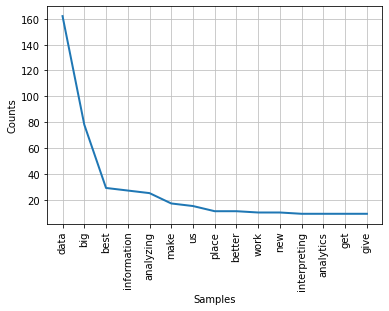

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [87]:
final_dist.plot(15)

## To be Honest we don't like these kind of graphs. Maybe we could try with Word Cloud!

In [90]:
!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [95]:
cloud_string= ' '.join(list_no_stopwords)
cloud_string

'change data system work company cares complete analyzation consumer satisfied work data analyst company data makes conclusion easy data works foundation data analyzing freeway data analysis great place examine data analyzing one place solution problems safe place information spirit data analyzing terabyte day keeps doctor away visible difference visionary application big data machine learning advance level interpreting advance style analyzing needs completed always think advance analyzing data affordable prices analyst interpreting information analytics used automate decisions analyze big data seconds analyzing matter fact analyzing future analyzing profitable analyzing accuracy trouble making sense big numbers competitive locomotive get demo free believe us best analyzation town best experts best data best interpretation dat best interpreting information best place attractiveness best place examine data best rating quality service best source best information better understand us bet

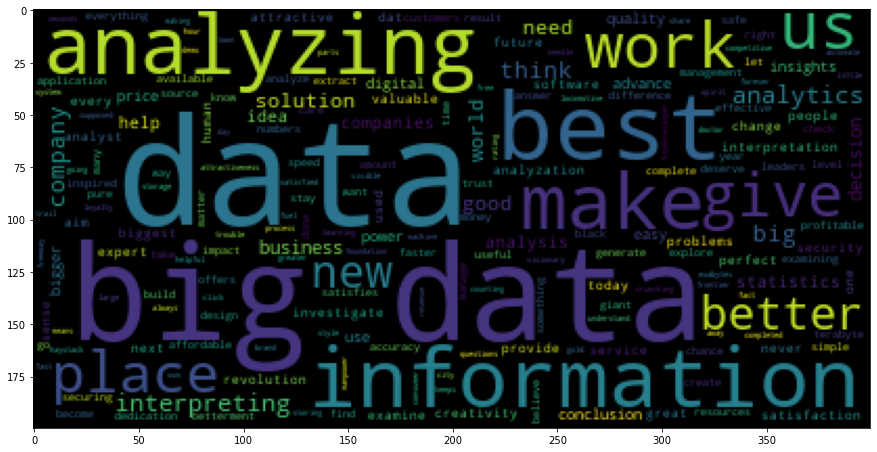

In [99]:
wordcloud_visual = WordCloud().generate(cloud_string)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud_visual)

## It would be nicer without the axes

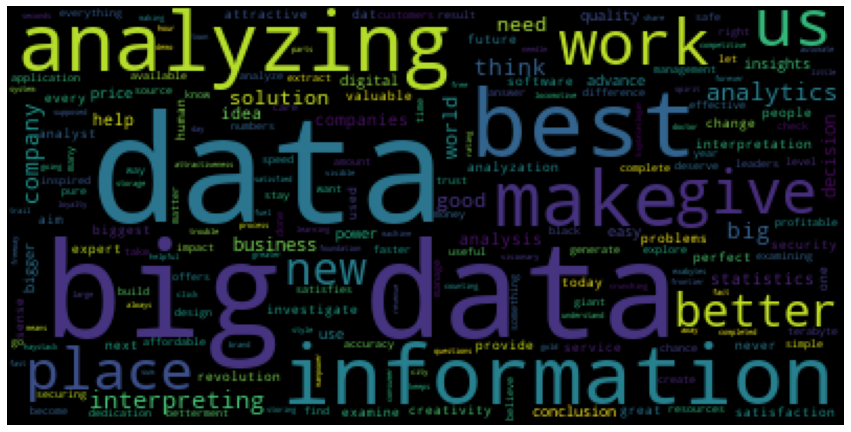

In [105]:
plt.figure(figsize=(15,15))
plt.imshow(wordcloud_visual)
plt.axis("off")
plt.show()

## So...If you are thinking about a slogan related to Analytics and want to Innovate, try avoiding these words! 😉